### Fourier transform for Mass Spectrometry course
*Marc-André Delsuc - Joensuu August 2018*


---
# Definitions, basic properties

---

# Time / Frequency

One example of the relation between time and frequencies - as observed in nature

![time vs frequency](files/cochlea.png)

- The pressure wave (top) is a function of time.
- It enters the ear and makes the ear-drum vibrate with the same pattern
- this creates a standing wave in the cochlea, this little organ in the inner ear looking like a snail.
- pressure nodes are located along the cochlea spiral, with their position depending on the frequency 
    - $\Rightarrow$ a mechanical Fourier transform !
- hair cells along the cochlea detect these nodes, and transmit the frequency information to the brain which recognizes the frequency patterns which characterize sound formants (the phonetic primitives), and understand the word.

The phonetic pattern is somehow the time-dependent **Fourier transform** of the inital pressure wave.

They both carry somehow the same information, but in a very different way.

---
# Fourier Transform Definition

Fourier Transform is formally defined on continuous functions:

for a function $f$ defined from $\mathbb{R}$ to $\mathbb{R}$ (or more precisely from $\mathbb{R}$ to $\mathbb{C}$), the **Fourier transform** of $f$ is another function $F$ (from $\mathbb{R}$ to $\mathbb{C}$) defined as:
$$
F(X) = \int_{-\infty}^{+\infty} f(x) e^{-2i \pi x X} dx
$$

$f(x)$ id Fourier transformed into $F(X)$

$x$ and $X$ represent two different quantities.

There are called reciproqual quantitites, and can be found in many domains

|$x$   |$X$   |
| ----- | ----- |
| $t$ : time (sec) | $\omega$ : frequency (Hz) |
| $x$ : space (Å) | $k$ : spacial frequency (Å$^{-1}$) |
| $\lambda$ : wavelength ($cm$) | $k$ : spacial frequency ($cm^{-1}$) |
| etc... | |

## a brief reminder on complex numbers.
*complex numbers are central to Fourier analysis, and their understanding is needed to fully comprehend the beauty of Fourier analysis*

**Real** numbers are *regular* numbers, going from $-\infty$ to $+\infty$ through every number you might want to use. They are said to belong to $\mathbb{R}$, the set of all real numbers, $\mathbb{R}$ can be seen as a line, going from $-\infty$ to $+\infty$.

If Reals are on a line, **Complex** numbers are on a plane. 
As any plane, the coordinates are defined on two axes, the horizontal axis is the $\mathbb{R}$ line, the vertical one is the *Imaginary* axis, also holding real numbers, and labeled with $i$.
This plane is called $\mathbb{C}$ the complex plane.


A complex number $z$ (a point in this plane) is thus described with two numbers, $a$ and $b$: $$z = a +ib$$
$a$ is the real part, and $b$ the imaginary part.

The position of the complex point $z$ can also be described by its *module* (the distance to the center)
$$ |z| = \sqrt{a^2 + b^2} $$
and the angle with the horizontal axis, called the *argument*, usually noted with a greek letter:
$$ arg(z) = \arctan \left(\frac b a \right) = \theta$$
It is defined only between $[0 .. 2\pi]$ as any other angle.

A complex number is fully determined by $a$ and $b$, as well as by its modulus and argument.
This is noted using the *Euler* notation:
$$ z = a+ib \\
z = |z|e^{i \arg(z)} = |z|e^{i \theta} $$

Complex numbers can be added and multiplied, they form an *algebra*.
You have a more detailed (in interactive) presentation in [the complex_reminder](complex_reminder.ipynb) file.

*see also: [Wikipedia:Complex_plane](https://en.wikipedia.org/wiki/Complex_plane) *


## in the computer
Fourier transform (or **FT**) is defined as a transformation of *continuous functions* $f$ from $\mathbb{R}$ to $\mathbb{C}$), they have to be integrable over $]-\infty ... \infty[$, and can be extended to the limit to *distributions* which somehow drops this later condition.


What we're doing in this course is performed on a computer, and computers cannot deal with *continuous functions* they can only handle *series* of numbers.
In consequence, the Fourier transform implememted in the computer is very different, it is actually another transform, called digital Fourier transform (or **DFT**), perfectly defined in mathematical terms, but very different in its form, that applies to finite series of values $y_k$.

DFT does not deal with continuous functions, but rather with series $x_n$ and $X_k$, instead of $f$ and $F$.
The DFT is defined as:
$$
X_k = \sum_{n=0}^{N-1} e^{-2i \pi \frac{kn}{N}}x_n
$$
(if you have read [the complex_reminder](complex_reminder.ipynb) you recognize $e^{-2i \pi \frac{kn}{N}}$ as the $N$ $n^{th}$ roots of 1 here.)

In the implementation of DFT in the computer, where we are going to use a *vector* of values `x[k]` as a representation of the series $x_k$.

In the computer, DFT transforms thus a vector into another vector, as it is a linear operation, it can be represented by a (usually square) matrix, and would take a burden proportional to $N^2$ to compute for a vector of length $N$.
Thanks to Cooley & Tuckey(1) there is an very efficient algorithm that does it in $N \log_2(N)$ operations provided $N$ is a power of two ($N=2^k$), and which is called Fast Fourier transform (or **FFT**).
FFT and DFT are strictly equivalent, as there are now effecient implementations that work well for nearly all $N$ values, however FFT is **much faster** than the regular matrix operation.

DFT and FT share so many properties in common that they will be considered as one same thing in the course*

1) Cooley, J., & Tukey, J. (1965). An algorithm for the machine calculation of complex Fourier series. *Mathematics of Computation*, **19** (90), 297–301.

*end of remark)*

# Fourier transform Properties
- FT is linear
    - $FT( f + \lambda g) = FT(f) + \lambda FT(g)$
- FT is inversible
    - $FT(f) = F \quad FT^{-1}(F) = f$
    - $FT^{-1} = FT^3 \quad FT^4 = Id$
- has symmetry properties
    - even function $\xrightarrow{FT}$ real function
    - real function $\xrightarrow{FT}$ even function
    - odd function $\xrightarrow{FT}$ imaginary function
    - imaginary function $\xrightarrow{FT}$ odd function
    - causal function $\xrightarrow{FT}$ Bayard-Bode conditions
        - causal is such as $f(t) = 0$ if $t \leq 0$
        - real $R$ and imaginary $I$ parts and Hilbert transform of each other
        $$ I(X) = \int_{-\infty}^{+\infty} \frac {R(X')}{X-X'} dX $$
- conserves the energy (with $F = FT(f)$:
   $$ \int_{-\infty}^{+\infty} |f(x)|^2 dt = \int_{-\infty}^{+\infty} |F(X)|^2 dX $$
- conserves the area:
    $$ F(0) =  \int_{-\infty}^{+\infty} f(x) dx $$
    $$ f(0) =  \int_{-\infty}^{+\infty} F(X) dX $$
    

# small simulation, to show the efficiency of the FFT algorithm
Comparing a regular matrix approach ( **FT** ) to the fast algorithm ( **FFT** )

Populating the interactive namespace from numpy and matplotlib


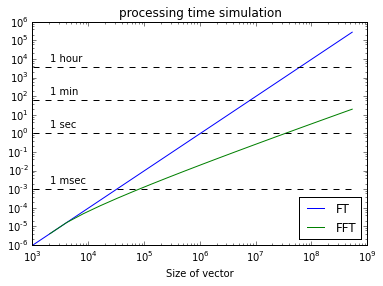

In [1]:
%pylab inline
P = np.arange(20)               # power of 2 
N = 1024*(2**P)                 # size of vectors, starting at 1k points
base = 1e-6/(N[0]**2)           # assume 1µsec processing for 1k vector ( my laptop )
plt.loglog(N, base*(N**2), label='FT')          # draw both
plt.loglog(N, 2*1024*base*N*P, label='FFT')
# some annotations
plt.title('processing time simulation'); plt.xlabel('Size of vector'); plt.legend(loc=0)
plt.plot(N, [1E-3]*20, '--k'); plt.text(2*1024, 2E-3, '1 msec')
plt.plot(N, [1]*20, '--k');    plt.text(2*1024, 2, '1 sec')
plt.plot(N, [60]*20, '--k');   plt.text(2*1024, 120, '1 min')
plt.plot(N, [3600]*20, '--k'); plt.text(2*1024, 2*3600, '1 hour')